In [1]:
import pandas as pd
import numpy as np
from scipy.stats import sem, ttest_ind, f_oneway, linregress, stats
from matplotlib import pyplot as plt

from re import sub
from decimal import Decimal
from textwrap import wrap

%matplotlib notebook

In [2]:
# Import Davis' dataframe for Question 1

company = "Resources/basic1000data.csv"
fortune1_df = pd.read_csv(company)
fortune1_df.head()

,Company,Revenues ($M),Profits ($M),Assets ($M),Employees,Sector,Industry,City,State,revenue,employees
0,Walmart,"$500,343","$9,862.00","$204,522","2,300,000",Retailing,General Merchandisers,Bentonville,AR,500343.0,2300000
1,Exxon Mobil,"$244,363","$19,710.00","$348,691","71,200",Energy,Petroleum Refining,Irving,TX,244363.0,71200
2,Berkshire Hathaway,"$242,137","$44,940.00","$702,095","377,000",Financials,Insurance: Property and Casualty (Stock),Omaha,NE,242137.0,377000
3,Apple,"$229,234","$48,351.00","$375,319","123,000",Technology,"Computers, Office Equipment",Cupertino,CA,229234.0,123000
4,UnitedHealth Group,"$201,159","$10,558.00","$139,058","260,000",Health Care,Health Care: Insurance and Managed Care,Minnetonka,MN,201159.0,260000


In [3]:
# Import Yujin's dataframe for Questions 2

company_df = pd.read_csv("Resources/company_data.csv")
company_df.head()

,Symbol,Name,Sector,Price,Price/Earnings,Dividend Yield,Earnings/Share,52 Week Low,52 Week High,Market Cap,EBITDA,Price/Sales,Price/Book,SEC Filings
0,MMM,3M Company,Industrials,222.89,24.31,2.332862,7.92,259.77,175.490,138721055226,9.048000e+09,4.390271,11.34,http://www.sec.gov/cgi-bin/browse-edgar?action...
1,AOS,A.O. Smith Corp,Industrials,60.24,27.76,1.147959,1.70,68.39,48.925,10783419933,6.010000e+08,3.575483,6.35,http://www.sec.gov/cgi-bin/browse-edgar?action...
2,ABT,Abbott Laboratories,Health Care,56.27,22.51,1.908982,0.26,64.60,42.280,102121042306,5.744000e+09,3.740480,3.19,http://www.sec.gov/cgi-bin/browse-edgar?action...
3,ABBV,AbbVie Inc.,Health Care,108.48,19.41,2.499560,3.29,125.86,60.050,181386347059,1.031000e+10,6.291571,26.14,http://www.sec.gov/cgi-bin/browse-edgar?action...
4,ACN,Accenture plc,Information Technology,150.51,25.47,1.714470,5.44,162.60,114.820,98765855553,5.643228e+09,2.604117,10.62,http://www.sec.gov/cgi-bin/browse-edgar?action...


In [4]:
#Import Dhruv's dataframe for Question 3

df_final_5 = pd.read_csv("Resources/Final_Dataframe.csv")
df_final_5.head()

,index,State,Sector,# Employees,State & Sector
0,0,AL,Health Care,30935,AL -- Health Care
1,1,AR,Retailing,2338300,AR -- Retailing
2,2,AZ,Technology,99243,AZ -- Technology
3,3,CA,Technology,1129452,CA -- Technology
4,4,CO,"Hotels, Restaurants & Leisure",89040,"CO -- Hotels, Restaurants & Leisure"


In [5]:
# Import Peta's dataframe for Questions 4 on CEO Salary

sector_ceo = pd.read_csv("Resources/sector_ceo.csv")
# sector_ceo = pd.read_csv

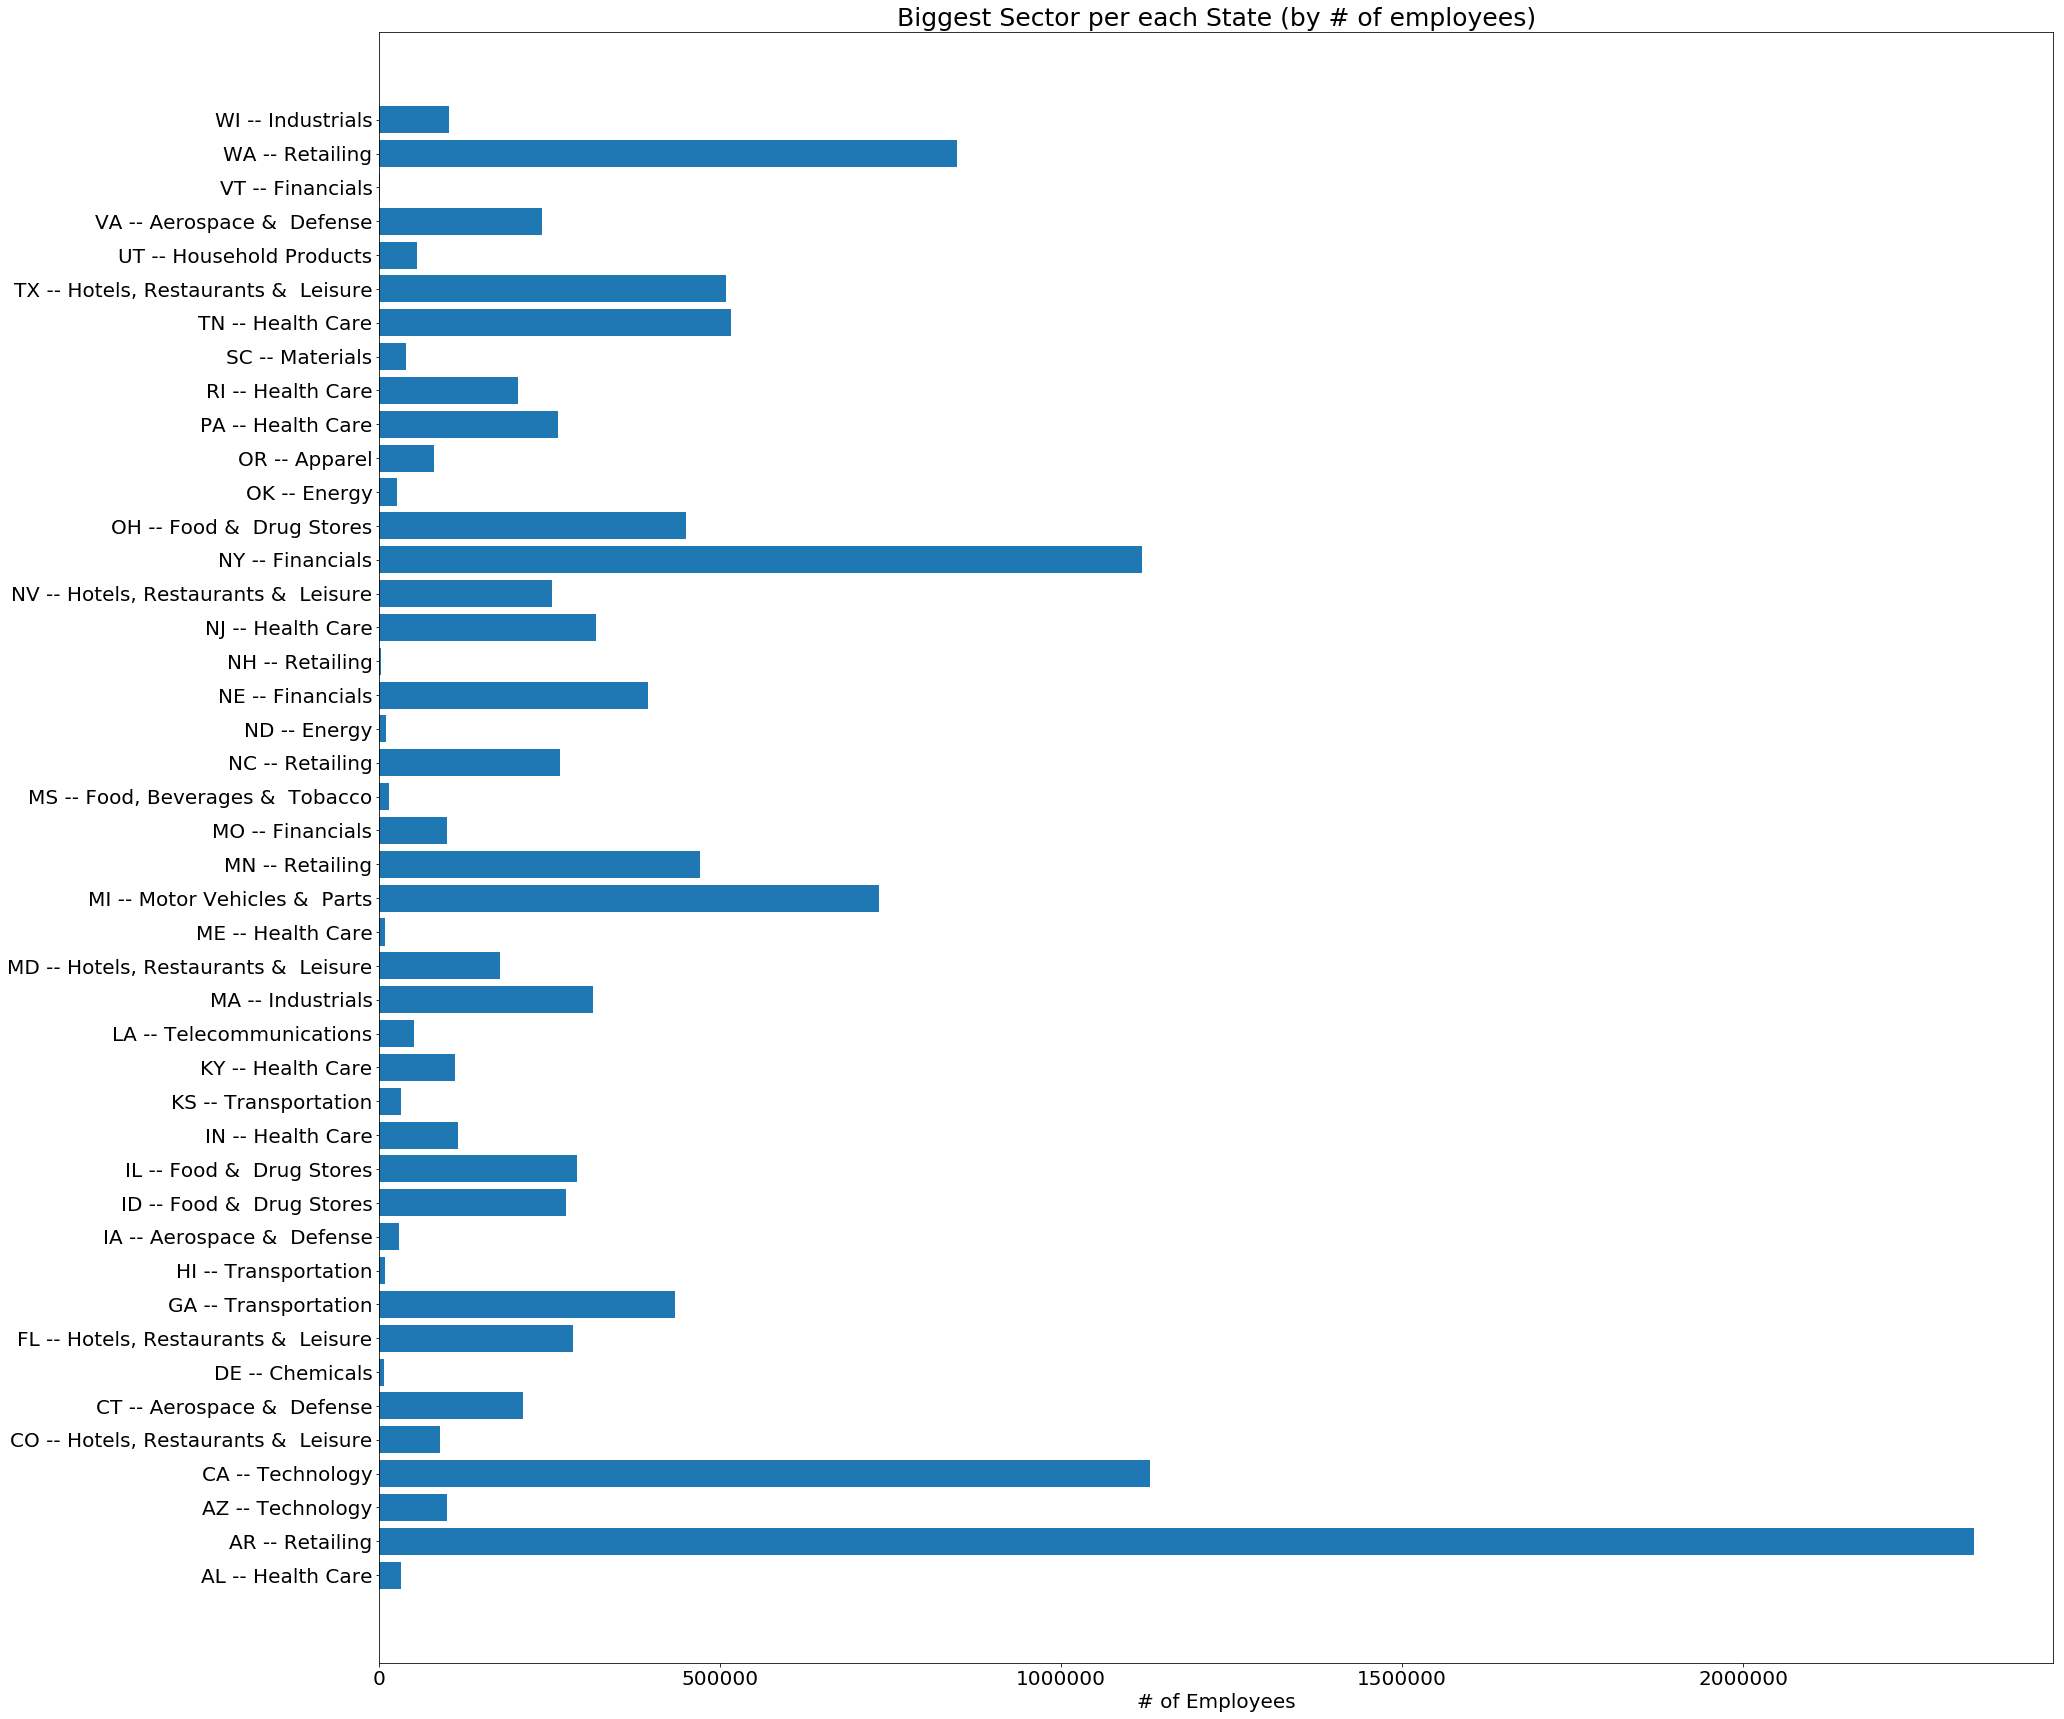

In [6]:
#Insert code for Dhruv's chart

plt.figure(figsize=(30,30))
plt.barh(df_final_5["State & Sector"], df_final_5["# Employees"])
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.xlabel("# of Employees", fontsize=20)
plt.title("Biggest Sector per each State (by # of employees)", fontsize=25)
plt.savefig("Images/SectorPopularityPerState.png")

In [7]:
# Yujin's Code ---------------------------------------------------------------------------------------------

In [8]:
#Number of Top 500 S&P Companies in each Industry Sector

company_group = company_df.groupby("Sector").count()
company_group[["Symbol"]]

,Symbol
Sector,
Consumer Discretionary,84
Consumer Staples,34
Energy,32
Financials,68
Health Care,61
Industrials,67
Information Technology,70
Materials,25
Real Estate,33


In [9]:
#how many computer/math employees there are per state

math_emp = "Resources/BLS_math_employees.csv"
math_df = pd.read_csv(math_emp, encoding="utf-8")
math_df = math_df.sort_values("Mean_wage_yr", ascending=False)
math_df = math_df[["State", "Mean_wage_yr"]]
math_top_5 = math_df.head()
math_top_5

,State,Mean_wage_yr
50,WA,108660
8,DC,108600
4,CA,108190
49,VA,102430
31,NJ,101390


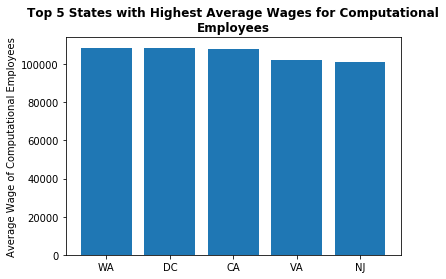

In [10]:
fig, ax = plt.subplots()
# x_axis = reformat_df.index

title = ax.set_title("\n".join(wrap("Top 5 States with Highest Average Wages for Computational Employees", 60)), fontweight="bold")

# fig.suptitle("Top 5 States with Highest Average Wages for Computational Employees")
# ax.set_xlabel("Number of Fortune 500 Companies per State")
ax.set_ylabel("Average Wage of Computational Employees")

# ax.set_ylim(30,75)
# ax.grid()

ax.bar(math_top_5["State"], math_top_5["Mean_wage_yr"])
plt.savefig("Images/top5highestavgwage.png")

In [11]:
fortune_1000 = pd.read_csv("Resources/fortune_1000_part.csv")
revenue_int = []
for x in fortune_1000["Revenues ($M)"]:
    revenue_int.append(float(x.replace("$","").replace(",","").replace(" ","")))
fortune_1000["Revenue as Int"] = revenue_int
fortune_1000.loc[fortune_1000["State"] == "Michigan", "State"] = "MI"
fortune_1000

,Company,Revenues ($M),Profits ($M),Assets ($M),Employees,Sector,Industry,City,State,Revenue as Int
0,Walmart,"$500,343","$9,862.00","$204,522","2,300,000",Retailing,General Merchandisers,Bentonville,AR,500343.0
1,Exxon Mobil,"$244,363","$19,710.00","$348,691","71,200",Energy,Petroleum Refining,Irving,TX,244363.0
2,Berkshire Hathaway,"$242,137","$44,940.00","$702,095","377,000",Financials,Insurance: Property and Casualty (Stock),Omaha,NE,242137.0
3,Apple,"$229,234","$48,351.00","$375,319","123,000",Technology,"Computers, Office Equipment",Cupertino,CA,229234.0
4,UnitedHealth Group,"$201,159","$10,558.00","$139,058","260,000",Health Care,Health Care: Insurance and Managed Care,Minnetonka,MN,201159.0
5,McKesson,"$198,533","$5,070.00","$60,969","64,500",Wholesalers,Wholesalers: Health Care,SF,CA,198533.0
6,CVS Health,"$184,765","$6,622.00","$95,131","203,000",Health Care,Health Care: Pharmacy and Other Services,Woonsocket,RI,184765.0
7,Amazon.com,"$177,866","$3,033.00","$131,310","566,000",Retailing,Internet Services and Retailing,Seattle,WA,177866.0
8,AT&T,"$160,546","$29,450.00","$444,097","254,000",Telecommunications,Telecommunications,Dallas,TX,160546.0
9,General Motors,"$157,311","($3,864.00)","$212,482","180,000",Motor Vehicles & Parts,Motor Vehicles and Parts,Detroit,MI,157311.0


In [12]:
fortune_group = fortune_1000.groupby("State")
fortune_count = fortune_group["Revenue as Int"].count()
fortune_count.sort_values()

state_df = pd.DataFrame(fortune_count)
state_df = state_df.drop(["Puerto Rico"], axis=0)
state_df

,Revenue as Int
State,
AL,3
AR,8
AZ,17
CA,118
CO,19
CT,27
DE,2
FL,35
GA,30


In [13]:
fortune_mean = fortune_group["Revenue as Int"].mean()
mean_df = pd.DataFrame(fortune_mean)
mean_df

,Revenue as Int
State,
AL,4651.466667
AR,71746.875000
AZ,6149.411765
CA,14922.652542
CO,7440.315789
CT,13847.222222
DE,5681.000000
FL,9397.025714
GA,14390.233333


In [14]:
mean_df = mean_df.drop(["Puerto Rico"], axis=0)
mean_df

,Revenue as Int
State,
AL,4651.466667
AR,71746.875000
AZ,6149.411765
CA,14922.652542
CO,7440.315789
CT,13847.222222
DE,5681.000000
FL,9397.025714
GA,14390.233333


In [15]:
merged_df = pd.merge(state_df, math_df, on="State")
merged_df = merged_df.rename(columns={"Revenue as Int":"Number of F100 Company", "Mean_wage_yr":"Average Wage"})
merged_df["Region"] = ""
merged_df = merged_df.set_index("State")
merged_df

,Number of F100 Company,Average Wage,Region
State,,,
AL,3,84290,
AR,8,68290,
AZ,17,83140,
CA,118,108190,
CO,19,96880,
CT,27,92590,
DE,2,93550,
FL,35,78780,
GA,30,88590,


In [16]:
west = ["WA", "OR", "NV", "ID", "MT", "WY", "UT", "CO", "HI", "AL", "CA"]
midwest = ["ND", "SD", "NE", "KS", "MN", "IA", "MO", "WI", "IL", "MI", "IN", "OH"]
northeast = ["PA", "MD", "DE", "NJ", "CT", "RI", "MA", "NH", "VT", "ME", "NY"]
southeast = ["AR", "LA", "MS", "TN", "KY", "WV", "VA", "NC", "SC", "GA", "AL","FL"]
southwest = ["AZ","NM","OK", "TX"]

for index, row in merged_df.iterrows():
    if index in west:
        merged_df.loc[index,"Region"] = "West"
    elif index in midwest:
        merged_df.loc[index,"Region"] = "Midwest"
    elif index in northeast:
        merged_df.loc[index,"Region"] = "Northeast"
    elif index in southeast:
        merged_df.loc[index,"Region"] = "Southeast"
    elif index in southwest:
        merged_df.loc[index,"Region"] = "Southwest"

merged_df

,Number of F100 Company,Average Wage,Region
State,,,
AL,3,84290,West
AR,8,68290,Southeast
AZ,17,83140,Southwest
CA,118,108190,West
CO,19,96880,West
CT,27,92590,Northeast
DE,2,93550,Northeast
FL,35,78780,Southeast
GA,30,88590,Southeast


In [17]:
region_group = merged_df.groupby("Region")
region_average = region_group["Average Wage"].mean()
region_companies = region_group["Number of F100 Company"].sum()
region_df = pd.DataFrame(region_companies)
region_df["Average Wage"] = region_average
region_df

,Number of F100 Company,Average Wage
Region,,
Midwest,263,78690.909091
Northeast,252,91263.636364
Southeast,178,78272.000000
Southwest,121,81806.666667
West,184,88482.222222


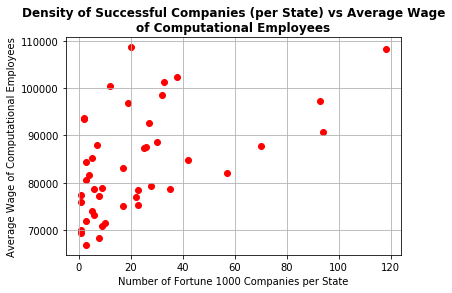

In [18]:
fig, ax = plt.subplots()
# x_axis = reformat_df.index

# fig.suptitle("Density of Successful Companies (per State) vs Average Wage of Computational Employees", fontsize=10, fontweight="bold")
title = ax.set_title("\n".join(wrap("Density of Successful Companies (per State) vs Average Wage of Computational Employees", 60)), fontweight="bold")

ax.set_xlabel("Number of Fortune 1000 Companies per State")
ax.set_ylabel("Average Wage of Computational Employees")

# ax.set_ylim(30,75)
ax.grid()

ax.scatter(merged_df["Number of F100 Company"], merged_df["Average Wage"], marker="o", color = "r")
# (slope, intercept, _,_,_) = linregress(merged_df["Number of F100 Company"], merged_df["Average Revenue"])
# line = slope * merged_df["Number of F100 Company"] + intercept
# ax.plot(merged_df["Number of F100 Company"], line, "r--")
# capomulin, = ax.plot(x_axis, reformat_df["Capomulin"], "r--", marker="o",linewidth=1)

plt.savefig("Images/f100perstate_vs_avgwage.png")

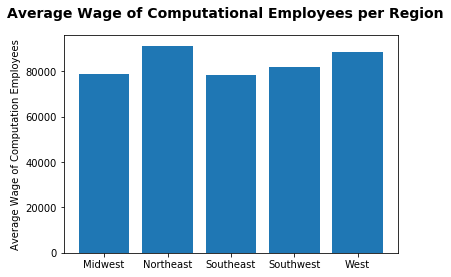

In [19]:
fig, ax = plt.subplots()
# x_axis = reformat_df.index

fig.suptitle("Average Wage of Computational Employees per Region", fontsize=14, fontweight="bold")
# title = ax.set_title("\n".join(wrap("Density of Successful Companies (per Region) vs Average Wage of Computational Employees", 60)), fontweight="bold")
# ax.set_xlabel("Number of Fortune 500 Companies per Region")
ax.set_ylabel("Average Wage of Computation Employees")

# ax.set_ylim(30,75)
# ax.grid()

ax.bar(region_df.index, region_df["Average Wage"])
# (slope, intercept, _,_,_) = linregress(region_df["Number of F100 Company"], region_df["Average Revenue"])
# line = slope * region_df["Number of F100 Company"] + intercept
# ax.plot(region_df["Number of F100 Company"], line, "r--")
# capomulin, = ax.plot(x_axis, reformat_df["Capomulin"], "r--", marker="o",linewidth=1)

plt.savefig("Images/regional_avgwage.png")

In [20]:
state_df_sort = state_df.sort_values("Revenue as Int", ascending = False)
state_df_sort = state_df_sort.head()
state_df_sort

,Revenue as Int
State,
CA,118
TX,94
NY,93
IL,70
OH,57


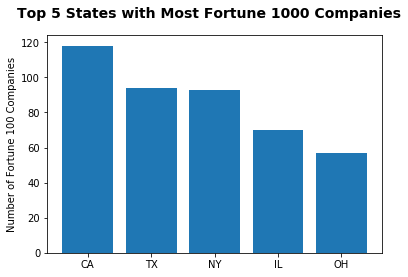

In [21]:
fig, ax = plt.subplots()
# x_axis = reformat_df.index

fig.suptitle("Top 5 States with Most Fortune 1000 Companies", fontsize=14, fontweight="bold")
# ax.set_xlabel("Number of Fortune 500 Companies per State")
ax.set_ylabel("Number of Fortune 100 Companies")

# ax.set_ylim(30,75)
# ax.grid()

ax.bar(state_df_sort.index, state_df_sort["Revenue as Int"])
plt.savefig("Images/top5stateswithmostf100.png")

In [22]:
west_df = merged_df.loc[merged_df["Region"] == "West", :]
midwest_df = merged_df.loc[merged_df["Region"] == "Midwest", :]
northeast_df = merged_df.loc[merged_df["Region"] == "Northeast", :]
southeast_df = merged_df.loc[merged_df["Region"] == "Southeast", :]
southwest_df = merged_df.loc[merged_df["Region"] == "Southwest", :]

west_df

,Number of F100 Company,Average Wage,Region
State,,,
AL,3,84290,West
CA,118,108190,West
CO,19,96880,West
HI,3,80570,West
ID,3,71910,West
NV,9,78960,West
OR,5,85140,West
UT,4,81740,West
WA,20,108660,West


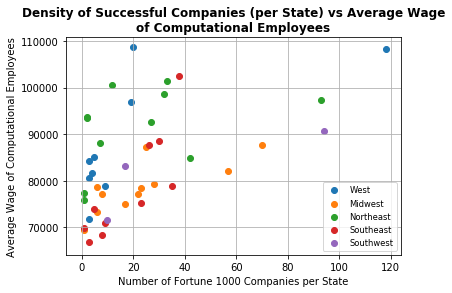

In [23]:
fig, ax = plt.subplots()

title = ax.set_title("\n".join(wrap("Density of Successful Companies (per State) vs Average Wage of Computational Employees", 60)), fontweight="bold")

ax.set_xlabel("Number of Fortune 1000 Companies per State")
ax.set_ylabel("Average Wage of Computational Employees")

ax.grid()

west_plot = ax.scatter(west_df["Number of F100 Company"], west_df["Average Wage"], marker="o", label = "West")
midwest_plot = ax.scatter(midwest_df["Number of F100 Company"], midwest_df["Average Wage"], marker="o", label = "Midwest")
northeast_plot = ax.scatter(northeast_df["Number of F100 Company"], northeast_df["Average Wage"], marker="o", label = "Northeast")
southeast_plot = ax.scatter(southeast_df["Number of F100 Company"], southeast_df["Average Wage"], marker="o", label = "Southeast")
southwest_plot = ax.scatter(southwest_df["Number of F100 Company"], southwest_df["Average Wage"], marker="o", label = "Southwest")

ax.legend(fontsize='small')


plt.savefig("Images/f100perstate_vs_avgwage_perregion.png")

In [24]:
f_oneway(west_df["Average Wage"], midwest_df["Average Wage"], northeast_df["Average Wage"], southeast_df["Average Wage"], southwest_df["Average Wage"])

F_onewayResult(statistic=3.637958367079861, pvalue=0.012999250758923213)

In [25]:
# ----------------------------------------------------------------------------------------------------------

In [26]:
#Peta's code on Question 4 on CEO Success

In [27]:
#Analysis by Sector

grouped_sector = sector_ceo.groupby("Sector")
grouped_sector

In [28]:
#A list of sectors and number of companies in each sector (total number 426)

total_companies = grouped_sector["Sector"].value_counts()
total_companies

Sector                      Sector                    
Consumer Discretionary      Consumer Discretionary        73
Consumer Staples            Consumer Staples              31
Energy                      Energy                        29
Financials                  Financials                    66
Health Care                 Health Care                   57
Industrials                 Industrials                   66
Information Technology      Information Technology        66
Materials                   Materials                     22
Real Estate                 Real Estate                   17
Telecommunication Services  Telecommunication Services     3
Utilities                   Utilities                     27
Name: Sector, dtype: int64

In [29]:
#Average Salary by Sector per million

avr_sal_sector = grouped_sector["Salary"].mean()/1000000
avr_sal_sector

Sector
Consumer Discretionary        15.070156
Consumer Staples              13.313947
Energy                        14.480887
Financials                    13.142770
Health Care                   15.656868
Industrials                   13.057138
Information Technology        16.758616
Materials                     12.245538
Real Estate                   10.035250
Telecommunication Services    28.993283
Utilities                     10.891315
Name: Salary, dtype: float64

In [30]:
#Average PE Ratio by Sector

avr_per_sector = grouped_sector["PE_Ratio"].mean()
avr_per_sector

Sector
Consumer Discretionary        25.961918
Consumer Staples              21.388065
Energy                        40.800690
Financials                    17.788939
Health Care                   23.974211
Industrials                   21.482273
Information Technology        38.120455
Materials                     18.998636
Real Estate                   28.850000
Telecommunication Services    11.190000
Utilities                     17.146296
Name: PE_Ratio, dtype: float64

In [31]:
#Average Market Capitalization by Sector - per billion (100 million)

avr_mktcap_sector = grouped_sector["Market Cap"].mean()/1000000000
avr_mktcap_sector

Sector
Consumer Discretionary         39.619113
Consumer Staples               63.572589
Energy                         45.577899
Financials                     51.863419
Health Care                    54.845145
Industrials                    36.202171
Information Technology         90.065983
Materials                      19.594157
Real Estate                    21.246479
Telecommunication Services    151.014248
Utilities                      22.459377
Name: Market Cap, dtype: float64

In [32]:
#Variables for scattergram

#Get range for salary - minumim
sector_ceo.Salary.min()

1

In [33]:
#Get range for salary - maximum
sector_ceo.Salary.max()

129499005

In [34]:
#Get range for pe ratio - miniumum
sector_ceo.PE_Ratio.min()

-251.53

In [35]:
#Get range for pe ratio - maximum
sector_ceo.PE_Ratio.max()

520.15

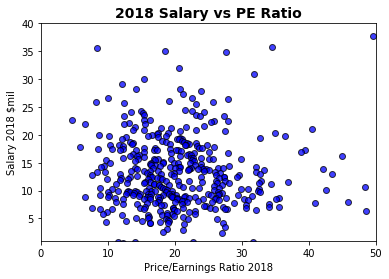

In [36]:
# Scatterplot of CEO Salary and success measured by PE Ratios

x_value = sector_ceo["PE_Ratio"]
y_axis = sector_ceo["Salary"]/1000000
x_limit = 50 #Max was 250, mean was 25, took out outliers

plt.ylim(1, 40) #Max is 130mil, took to down to 30 mil
plt.xlim(0, x_limit) #Min is -255

x_axis = np.arange(0, x_limit, 50)

# Build the scatter plot
plt.scatter(x_value, y_axis, marker="o", facecolors="blue", edgecolors="black", alpha=0.75)

# Incorporate the other graph properties

plt.title("2018 Salary vs PE Ratio", fontsize=14, fontweight="bold")
plt.xlabel("Price/Earnings Ratio 2018")
plt.ylabel("Salary 2018 $mil")
#plt.legend(loc="upper right")

# Save Figure
plt.savefig("scatter_salary_per.png")

# Show plot
plt.show()

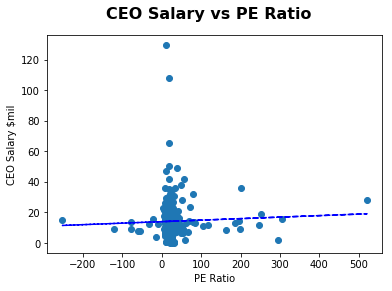

In [37]:
#Regression of salary on PE Ratio
# Set data
x_axis = sector_ceo["PE_Ratio"]
y_axis = sector_ceo["Salary"]/1000000

# Set line
(slope, intercept, _, _, _) = linregress(x_axis, y_axis)
fit = slope * x_axis + intercept

# Plot data
fig, ax = plt.subplots()

fig.suptitle("CEO Salary vs PE Ratio", fontsize=16, fontweight="bold")

#ax.set_xlim(0, 50)
#ax.set_ylim(0, 50)

ax.set_xlabel("PE Ratio")
ax.set_ylabel("CEO Salary $mil")

ax.plot(x_axis, y_axis, linewidth=0, marker='o')
ax.plot(x_axis, fit, 'b--')

# Save Figure
plt.savefig("ceo_per_regression.png")

plt.show()

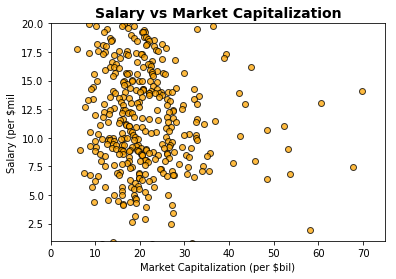

In [38]:
# Scatterplot of CEO Salary and Market Capitalization

y_axis = sector_ceo['Salary']/1000000
x_axis = sector_ceo['Market Cap']/100000000

x_limit = 75
plt.ylim(1, 20)
plt.xlim(0, x_limit)

x_axis = np.arange(0, x_limit, 50)

# Build the scatter plot
plt.scatter(x_value, y_axis, marker="o", facecolors="orange", edgecolors="black", alpha=0.75)

# Incorporate the other graph properties

plt.title("Salary vs Market Capitalization", fontsize=14, fontweight="bold")
plt.xlabel("Market Capitalization (per $bil)")
plt.ylabel("Salary (per $mil")
#plt.legend(loc="upper right")

# Save Figure
plt.savefig("salary_mktcap_scatter.png")

# Show plot
plt.show()

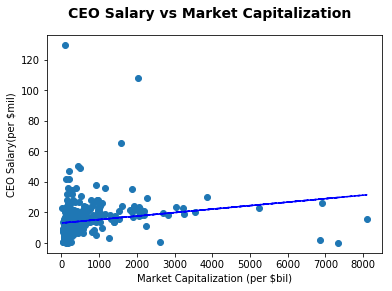

In [39]:
#Regression Analysis of CEO Salary to market capitalization

y_axis = sector_ceo['Salary']/1000000
x_axis = sector_ceo['Market Cap']/100000000

# Set line
(slope, intercept, _, _, _) = linregress(x_axis, y_axis)
fit = slope * x_axis + intercept

# Plot data
fig, ax = plt.subplots()
fig.suptitle("CEO Salary vs Market Capitalization", fontsize=14, fontweight="bold")
ax.set_xlabel("Market Capitalization (per $bil)")
ax.set_ylabel("CEO Salary(per $mil)")

ax.plot(x_axis, y_axis, linewidth=0, marker='o')
ax.plot(x_axis, fit, 'b--')

# Save Figure
plt.savefig("salary_mktcap_avg.png")
plt.show()                       

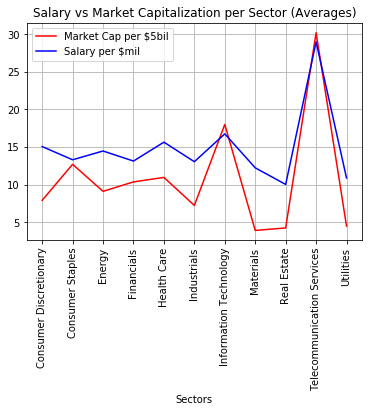

In [40]:
#Compare Sectors - Average salary and market capitalization

market_cap = avr_mktcap_sector/5
salary = avr_sal_sector

market_cap, = plt.plot(market_cap, color="red", label="Market Cap per $5bil")
salary, = plt.plot(salary, color="blue", label="Salary per $mil")

plt.legend(handles=[market_cap, salary], loc="best")
plt.grid()
plt.title("Salary vs Market Capitalization per Sector (Averages)")
plt.xlabel("Sectors")
plt.xticks(rotation = 'vertical')
plt.savefig("sector_lines.png")
plt.show()

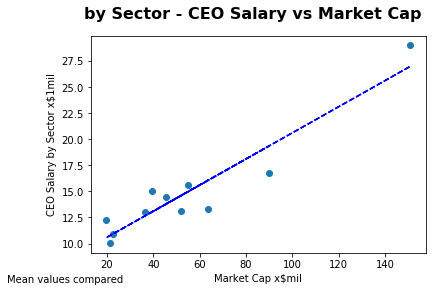

In [41]:
#Regression Plot by Sector of PE Ratio/CEO Salary

# Set data
x_axis = avr_mktcap_sector
y_axis = avr_sal_sector

# Set line
(slope, intercept, _, _, _) = linregress(x_axis, y_axis)
fit = slope * x_axis + intercept

# Plot data
fig, ax = plt.subplots()
fig.suptitle("by Sector - CEO Salary vs Market Cap", fontsize=16, fontweight="bold")
plt.text(2, 7, 'Mean values compared',
         horizontalalignment='center',
         verticalalignment='top',
         multialignment='center')

ax.set_xlabel("Market Cap x$mil")
ax.set_ylabel("CEO Salary by Sector x$1mil")

ax.plot(x_axis, y_axis, linewidth=0, marker='o')
ax.plot(x_axis, fit, 'b--')

# Save Figure
plt.savefig("sector_mktcap_f.png")

plt.show()

In [42]:
# Calculate Independent (Two Sample) T-Test

sector1 = avr_mktcap_sector
sector2 = avr_sal_sector
stats.ttest_ind(sector1, sector2, equal_var=False)

Ttest_indResult(statistic=3.3760880915778673, pvalue=0.006718662901673104)

In [43]:
# The ttest has a value of 0.0067, which is much less than threshold value of 0.05.
# There is a significant relationship between the salary a CEO is paid 
# and the industry they work in. 

In [44]:
#creating new dataframes by sector That were specific to my (Davis) workflow
retailing = fortune1_df[fortune1_df['Sector'] == 'Retailing']
Energy = fortune1_df[fortune1_df['Sector'] == 'Energy']
finance = fortune1_df[fortune1_df['Sector'] == 'Financials']
tech = fortune1_df[fortune1_df['Sector'] == 'Technology']
healthcare = fortune1_df[fortune1_df['Sector'] == 'Health Care']
wholesalers = fortune1_df[fortune1_df['Sector'] == 'Wholesalers']
telcom = fortune1_df[fortune1_df['Sector'] == 'Telecommunications']
motorvehicles = fortune1_df[fortune1_df['Sector'] == 'Motor Vehicles &  Parts']
food = fortune1_df[fortune1_df['Sector'] == 'Food &  Drug Stores']
industrials = fortune1_df[fortune1_df['Sector'] == 'Industrials']
aerospace = fortune1_df[fortune1_df['Sector'] == 'Aerospace &  Defense']
household = fortune1_df[fortune1_df['Sector'] == 'Household Products']
transportation  = fortune1_df[fortune1_df['Sector'] == 'Transportation']
foodbevtobacco = fortune1_df[fortune1_df['Sector'] == 'Food, Beverages &  Tobacco']
chemicals = fortune1_df[fortune1_df['Sector'] == 'Chemicals']
media = fortune1_df[fortune1_df['Sector'] == 'Media']
apparel = fortune1_df[fortune1_df['Sector'] == 'Apparel']
materials = fortune1_df[fortune1_df['Sector'] == 'Materials']
hotels = fortune1_df[fortune1_df['Sector'] == 'Hotels, Restaurants &  Leisure']
business = fortune1_df[fortune1_df['Sector'] == 'Business Services']
engineering = fortune1_df[fortune1_df['Sector'] == 'Engineering &  Construction']


state_array = fortune1_df["State"].unique()

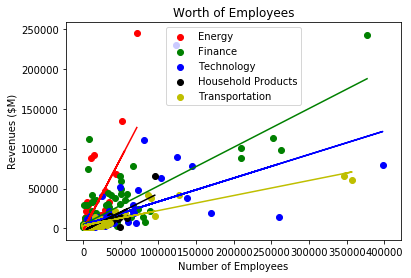

In [45]:
plt.scatter(Energy['employees'], Energy["revenue"], color = 'r', label = 'Energy')
plt.scatter(finance['employees'], finance["revenue"], color = 'g',label = 'Finance')
plt.scatter(tech['employees'], tech["revenue"], color = 'b',label = 'Technology')
plt.scatter(household['employees'], household["revenue"], color = 'k',label = 'Household Products')
plt.scatter(transportation['employees'], transportation["revenue"], color = 'y', label = 'Transportation')

plt.legend()

plt.xlabel("Number of Employees")
plt.ylabel("Revenues ($M)")
plt.title("Worth of Employees")

#regression lines
(slope, intercept, _, _, _) = stats.linregress(Energy["employees"], Energy["revenue"])
plt.plot(Energy['employees'],intercept + slope*Energy['employees'], 'r')
energy_slope = slope

(slope2, intercept2, _, _, _) = stats.linregress(finance["employees"], finance["revenue"])
plt.plot(finance['employees'],intercept2 + slope2*finance['employees'], 'g')
finance_slope = slope2

(slope3, intercept3, _, _, _) = stats.linregress(tech["employees"], tech["revenue"])
plt.plot(tech['employees'],intercept3 + slope3*tech['employees'], 'b')
tech_slope = slope3

(slope4, intercept4, _, _, _) = stats.linregress(household["employees"], household["revenue"])
plt.plot(household['employees'],intercept4 + slope4*household['employees'], 'k')
household_slope = slope4

(slope5, intercept5, _, _, _) = stats.linregress(transportation["employees"], transportation["revenue"])
plt.plot(transportation['employees'],intercept5 + slope5*transportation['employees'], 'y')
transportation_slope = slope5

plt.savefig('Images/energyfinancetechhousetrans.png')

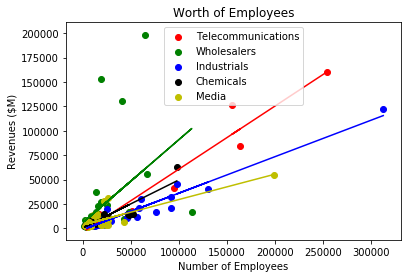

In [46]:
plt.scatter(telcom['employees'], telcom["revenue"], color = 'r', marker = 'o',label = 'Telecommunications')
plt.scatter(wholesalers['employees'], wholesalers["revenue"], color = 'g', marker = 'o',label = 'Wholesalers')
plt.scatter(industrials['employees'], industrials["revenue"], color = 'b', marker = 'o', label = 'Industrials')
plt.scatter(chemicals['employees'], chemicals["revenue"], color = 'k', marker = 'o',label = 'Chemicals')
plt.scatter(media['employees'], media["revenue"], color = 'y', marker = 'o',label = 'Media')

plt.legend()

plt.xlabel("Number of Employees")
plt.ylabel("Revenues ($M)")
plt.title("Worth of Employees")

(slope, intercept, _, _, _) = stats.linregress(wholesalers["employees"], wholesalers["revenue"])
plt.plot(wholesalers['employees'],intercept + slope*wholesalers['employees'], 'g')
wholesalers_slope = slope

(slope2, intercept2, _, _, _) = stats.linregress(telcom["employees"], telcom["revenue"])
plt.plot(telcom['employees'],intercept2 + slope2*telcom['employees'], 'r')
telcom_slope = slope2

(slope3, intercept3, _, _, _) = stats.linregress(industrials["employees"], industrials["revenue"])
plt.plot(industrials['employees'],intercept3 + slope3*industrials['employees'], 'b')
industrials_slope = slope3

(slope4, intercept4, _, _, _) = stats.linregress(chemicals["employees"], chemicals["revenue"])
plt.plot(chemicals['employees'],intercept4 + slope4*chemicals['employees'], 'k')
chemicals_slope = slope4

(slope5, intercept5, _, _, _) = stats.linregress(media["employees"], media["revenue"])
plt.plot(media['employees'],intercept5 + slope5*media['employees'], 'y')
media_slope = slope5

plt.savefig('Images/telcomwholesaleindustchemmedia.png')

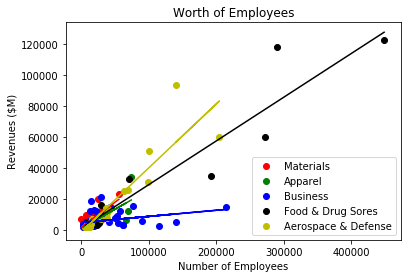

In [47]:
plt.scatter(materials['employees'], materials["revenue"], color = 'r', marker = 'o',label ='Materials')
plt.scatter(apparel['employees'], apparel["revenue"], color = 'g', marker = 'o', label = 'Apparel')
plt.scatter(business['employees'], business["revenue"], color = 'b', marker = 'o', label = 'Business')
plt.scatter(food['employees'], food["revenue"], color = 'k', label = 'Food & Drug Sores')
plt.scatter(aerospace['employees'], aerospace["revenue"], color = 'y', label = 'Aerospace & Defense')

plt.legend()

plt.xlabel("Number of Employees")
plt.ylabel("Revenues ($M)")
plt.title("Worth of Employees")

(slope, intercept, _, _, _) = stats.linregress(materials["employees"], materials["revenue"])
plt.plot(materials['employees'],intercept + slope*materials['employees'], 'r')
materials_slope = slope

(slope2, intercept2, _, _, _) = stats.linregress(apparel["employees"], apparel["revenue"])
plt.plot(apparel['employees'],intercept2 + slope2*apparel['employees'], 'g')
apparel_slope = slope2

(slope3, intercept3, _, _, _) = stats.linregress(business["employees"], business["revenue"])
plt.plot(business['employees'],intercept3 + slope3*business['employees'], 'b')
business_slope = slope3

(slope4, intercept4, _, _, _) = stats.linregress(food["employees"], food["revenue"])
plt.plot(food['employees'],intercept4 + slope4*food['employees'], 'k')
food_slope = slope4

(slope5, intercept5, _, _, _) = stats.linregress(aerospace["employees"], aerospace["revenue"])
plt.plot(aerospace['employees'],intercept5 + slope5*aerospace['employees'], 'y')
aerospace_slope = slope5



plt.savefig('Images/materialsapparelbusfoodaero.png')

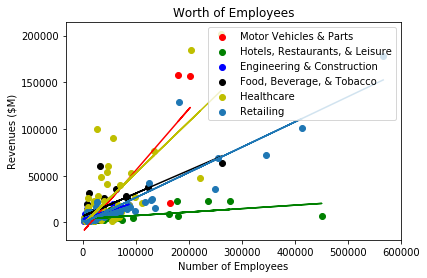

<Figure size 432x288 with 0 Axes>

In [48]:
plt.scatter(motorvehicles['employees'], motorvehicles["revenue"], color = 'r', label = 'Motor Vehicles & Parts')
plt.scatter(hotels['employees'], hotels["revenue"], color = 'g', label = 'Hotels, Restaurants, & Leisure')
plt.scatter(engineering['employees'], engineering["revenue"], color = 'b', marker = 'o', label = 'Engineering & Construction ')
plt.scatter(foodbevtobacco['employees'], foodbevtobacco["revenue"], color = 'k', label = 'Food, Beverage, & Tobacco')
plt.scatter(healthcare['employees'], healthcare["revenue"], color = 'y', marker = 'o',label = 'Healthcare')

retailing = retailing.drop(0)
plt.scatter(retailing['employees'], retailing["revenue"], label = 'Retailing')

plt.legend()

plt.xlabel("Number of Employees")
plt.ylabel("Revenues ($M)")
plt.title("Worth of Employees")


(slope, intercept, _, _, _) = stats.linregress(motorvehicles["employees"], motorvehicles["revenue"])
plt.plot(motorvehicles['employees'],intercept + slope*motorvehicles['employees'], 'r')
motorvehicles_slope = slope 

(slope2, intercept2, _, _, _) = stats.linregress(hotels["employees"], hotels["revenue"])
plt.plot(hotels['employees'],intercept2 + slope2*hotels['employees'], 'g')
hotels_slope = slope2

(slope3, intercept3, _, _, _) = stats.linregress(engineering["employees"], engineering["revenue"])
plt.plot(engineering['employees'],intercept3 + slope3*engineering['employees'], 'b')
engineering_slope = slope3

(slope4, intercept4, _, _, _) = stats.linregress(foodbevtobacco["employees"], foodbevtobacco["revenue"])
plt.plot(foodbevtobacco['employees'],intercept4 + slope4*foodbevtobacco['employees'], 'k')
foodbevtobacco_slope = slope4

(slope5, intercept5, _, _, _) = stats.linregress(healthcare["employees"], healthcare["revenue"])
plt.plot(healthcare['employees'],intercept5 + slope5*healthcare['employees'], 'y')
healthcare_slope = slope5

(slope6, intercept6, _, _, _) = stats.linregress(retailing["employees"], retailing["revenue"])
plt.plot(retailing['employees'],intercept6 + slope6*retailing['employees'])
retailing_slope = slope6

plt.show()

plt.savefig('Images/everythingelse.png')

In [49]:
#ttest of whole population without the oulier of Wal-Mart

fortune_dfnowm = fortune1_df.drop(0)

print(stats.ttest_1samp(fortune_dfnowm['employees'], fortune_dfnowm['revenue'].mean()))

Ttest_1sampResult(statistic=9.74029593282731, pvalue=1.7713872902111834e-21)


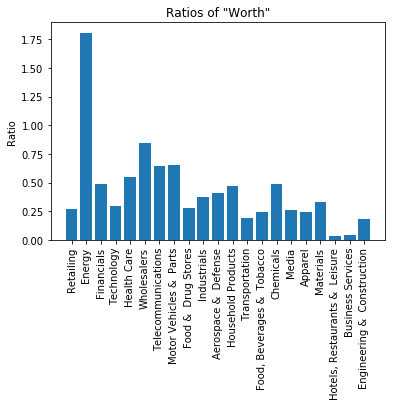

In [50]:
#creating a dataframe to compare the ratios of "worth" of an employee to a comapany.

ratio_df = pd.DataFrame({
            "Sectors": ['Retailing', 'Energy', 'Financials', 'Technology', 'Health Care',
       'Wholesalers', 'Telecommunications', 'Motor Vehicles &  Parts',
       'Food &  Drug Stores', 'Industrials', 'Aerospace &  Defense',
       'Household Products', 'Transportation',
       'Food, Beverages &  Tobacco', 'Chemicals', 'Media', 'Apparel',
       'Materials', 'Hotels, Restaurants &  Leisure', 'Business Services',
       'Engineering &  Construction'],
        "Ratios": [retailing_slope,energy_slope,finance_slope,tech_slope,healthcare_slope,wholesalers_slope,telcom_slope,
                  motorvehicles_slope,food_slope,industrials_slope,aerospace_slope,household_slope,transportation_slope,
                  foodbevtobacco_slope,chemicals_slope,media_slope,apparel_slope,materials_slope,hotels_slope,business_slope,
                  engineering_slope]
                    })
ratio_df.head()


plt.bar(ratio_df["Sectors"],ratio_df["Ratios"])
plt.xticks(rotation=90)
plt.ylabel("Ratio")
plt.title('Ratios of "Worth"' )

plt.savefig('Images/barchart.png')